In [3]:
import os
import numpy as np
from PIL import Image
%matplotlib inline 
from matplotlib import pyplot as plt
from tqdm import tqdm

In [4]:
np.random.seed(0)
np.set_printoptions(precision=6, suppress=True)

In [5]:
num_class = 26 # number of output neurons
image_size = 32
input_dim = image_size * image_size # input dimension
layer_count = 1
learning_rate = 1e-2

In [6]:
def open_image(path):
    # open image and convert to grayscale
    img = Image.open(path).convert("L")
    return img

def compress_image(img, size=32):
    # downsample image from 128x128 to 32x32
    img = img.resize((size, size))
    img_array = np.array(img)
    # convert to 1D array and normalize pixel values to between 0 and 1
    img_array = img_array.reshape(-1) / 255
    return img_array

In [7]:
def neuron_formula(x, weights, biases):
    return np.dot(weights, x) + biases # z = w.x + b

def softmax(z): 
    array = []
    sum_exp_z = np.exp(z).sum(axis=0) # obtain the sum of the exponentials of all z values
    for output in z:
        array.append(np.exp(output)/sum_exp_z) # obtain the predicted probability of each class
    return np.array(array)

def deriv_loss_function_w(actual, experimental, batch_array):
    return np.dot((experimental - actual), batch_array.T)

def deriv_loss_function_b(actual, experimental):
    return (experimental-actual)

def use_gradient_descent(alpha, error_w, error_b, weights, biases):
    new_weight = weights - alpha * error_w
    new_bias = biases - alpha * error_b
    return new_weight, new_bias

In [8]:
def predict(img, weights, biases):
    z = neuron_formula(img,  weights, biases) # (26, 32)
    prediction = softmax(z)
    return prediction

def get_loss(actual, experimental):
    return -np.sum(actual * np.log(experimental))

In [9]:
# get all folders with letters a-z
folders = [name for name in os.listdir(".") if os.path.isdir(name) and (name.startswith('6') or name.startswith('7'))]
folders.sort()

# load all images and create class labels
images = []
labels = []
for i in range(len(folders)):
    folder = folders[i]
    for file in os.listdir(f'./{folder}/hsf_4'):
        img = open_image(f'./{folder}/hsf_4/{file}')
        images.append(compress_image(img, image_size))
        labels.append([0 for _ in range(len(folders))])
        labels[-1][i] = 1

In [10]:
labels_array = np.array(labels).T # dimensions: (26, 12000)
image_array = np.array(images).T # dimensions: (1024, 12000)

In [11]:
# initialize random weights and biases
np.random.seed(0)
old_weights = np.random.randn(num_class, input_dim) / 10000 # dimensions: (26, 1024)
old_biases = np.random.randn(num_class, 1) / 10000 # dimensions: (26, 1)

# original weights and biases
print(old_weights)
print(old_biases)

[[ 0.000176  0.00004   0.000098 ...  0.00007  -0.000042 -0.00011 ]
 [ 0.000171 -0.000079 -0.000105 ...  0.00001  -0.000048  0.000127]
 [-0.00017   0.000073 -0.000186 ... -0.000122 -0.000094  0.000025]
 ...
 [ 0.000057 -0.000148 -0.000077 ...  0.00001  -0.000037 -0.000106]
 [-0.00003   0.000081  0.000086 ... -0.000054  0.000085  0.000003]
 [ 0.00021  -0.000143  0.000082 ...  0.00004  -0.000005  0.000112]]
[[-0.000065]
 [ 0.000101]
 [-0.000025]
 [-0.000053]
 [-0.000024]
 [-0.000011]
 [ 0.000113]
 [-0.000072]
 [ 0.000055]
 [-0.000097]
 [-0.000088]
 [-0.000182]
 [-0.000068]
 [ 0.00001 ]
 [ 0.000053]
 [ 0.000106]
 [ 0.000001]
 [ 0.000146]
 [-0.00013 ]
 [ 0.00019 ]
 [-0.000077]
 [-0.000001]
 [ 0.000084]
 [-0.000067]
 [ 0.000093]
 [ 0.000097]]


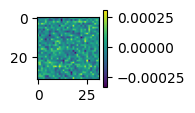

In [12]:
# show the weight visualization for the first weight (corresponding to the letter 'x')

w = old_weights.reshape(num_class, image_size, image_size)

plt.figure(figsize = (1,1))
plt.imshow(w[23])
plt.colorbar()
plt.show() 

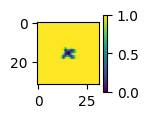

[[0.038307]
 [0.038512]
 [0.038242]
 [0.038427]
 [0.038541]
 [0.038442]
 [0.038447]
 [0.038353]
 [0.038264]
 [0.038521]
 [0.038564]
 [0.03828 ]
 [0.038405]
 [0.038677]
 [0.038513]
 [0.038695]
 [0.038444]
 [0.038456]
 [0.038525]
 [0.038566]
 [0.038545]
 [0.038526]
 [0.038611]
 [0.038363]
 [0.038379]
 [0.038395]]
3.260673491790949


In [13]:
# first prediction
test_image = compress_image(open_image('./78/hsf_4/hsf_4_00062.png'), image_size)

test_image = test_image.reshape(image_size * image_size, 1)
test_image = np.array(test_image)

test_label_array = [0 for _ in range(len(folders))]
test_label_array[23] = 1
test_label_array = np.array(test_label_array).reshape(num_class, 1)

reshaped = test_image.reshape(image_size, image_size)

plt.figure(figsize = (1,1))
plt.imshow(reshaped)
plt.colorbar()
plt.show()

prediction = predict(test_image, old_weights, old_biases)
print(prediction)
print(get_loss(test_label_array, prediction))

In [14]:
# first calculations for first image
w_dummy = np.array(old_weights)
b_dummy = np.array(old_biases)
img_dummy = test_image

z_dummy = neuron_formula(img_dummy, w_dummy, b_dummy)
p_dummy = softmax(z_dummy)

print(z_dummy) # z
print(p_dummy) # predictions

loss = get_loss(test_label_array, p_dummy) # loss

loss_function_b_dummy =  p_dummy - test_label_array 
loss_function_w_dummy = np.dot(loss_function_b_dummy, test_image.T) 

w_dummy, b_dummy = use_gradient_descent(learning_rate, loss_function_w_dummy, loss_function_b_dummy, old_weights, old_biases)

# new weights and biases
print(w_dummy)
print(b_dummy)


[[-0.004382]
 [ 0.000955]
 [-0.006087]
 [-0.001267]
 [ 0.001711]
 [-0.000881]
 [-0.00075 ]
 [-0.00318 ]
 [-0.005497]
 [ 0.001197]
 [ 0.002298]
 [-0.005099]
 [-0.001843]
 [ 0.005223]
 [ 0.000981]
 [ 0.005698]
 [-0.000812]
 [-0.000495]
 [ 0.001293]
 [ 0.00236 ]
 [ 0.001817]
 [ 0.001313]
 [ 0.003507]
 [-0.002937]
 [-0.002507]
 [-0.002104]]
[[0.038307]
 [0.038512]
 [0.038242]
 [0.038427]
 [0.038541]
 [0.038442]
 [0.038447]
 [0.038353]
 [0.038264]
 [0.038521]
 [0.038564]
 [0.03828 ]
 [0.038405]
 [0.038677]
 [0.038513]
 [0.038695]
 [0.038444]
 [0.038456]
 [0.038525]
 [0.038566]
 [0.038545]
 [0.038526]
 [0.038611]
 [0.038363]
 [0.038379]
 [0.038395]]
[[-0.000207 -0.000343 -0.000285 ... -0.000313 -0.000425 -0.000493]
 [-0.000214 -0.000464 -0.00049  ... -0.000375 -0.000433 -0.000258]
 [-0.000552 -0.000309 -0.000568 ... -0.000504 -0.000477 -0.000357]
 ...
 [ 0.009673  0.009468  0.009539 ...  0.009626  0.009579  0.00951 ]
 [-0.000413 -0.000303 -0.000297 ... -0.000438 -0.000299 -0.000381]
 [-0.000

In [15]:
# # calculations with one weight at a time
# np.random.seed(0)
# weights = np.random.randn(num_class, input_dim)/10000
# biases = np.random.randn(num_class, 1)/10000

# epochs = 100
# total = 12000

# for e in range(epochs): # how many times to get batch 
#     correct = 0
#     losses = []
#     indices = np.arange(image_array.shape[1])
#     np.random.shuffle(indices)
#     for f in tqdm(range(total)):
#         new_weights = np.array(weights)
#         new_biases = np.array(biases)
#         idx = indices[f:f+1] # NOTE batch_indices have to be in range of the row
#         used_image_array = image_array[:, idx] # (1024, 1)
#         used_label_array = labels_array[:, idx] # (26, 1)
        
#         exp = []
#         for i in range(num_class):
#             dot_product = np.dot(weights[i], used_image_array)
#             z = dot_product + biases[i]
#             exp_z = np.exp(z)
#             exp.append(exp_z)
                
#         predictions = []
#         exponent_array = np.array(exp)
#         exponent_sum = exponent_array.sum()
#         for i in range(num_class):
#             prediction = exponent_array[i] / exponent_sum
#             predictions.append(prediction)
    
#         for i in range(len(predictions)):
#             deriv_loss_bias = predictions[i] - used_label_array[i]
#             for j in range(input_dim):
#                 new_weights[i][j] = weights[i][j] - learning_rate * deriv_loss_bias[0] * used_image_array.reshape(-1)[j]
#             new_biases[i] = biases[i] - learning_rate * deriv_loss_bias[0]
       
#         prediction_array = np.array(predictions) # (1, 26)
#         likely = prediction_array.argmax() # get maximum value in the array
#         if used_label_array[likely][0] == 1:
#             correct += 1
#         weights = new_weights
#         biases = new_biases
        
        
#     print(f'Epoch {e}: {correct}/{total}', correct/total*100)
        


 60%|██████    | 7231/12000 [02:56<01:56, 40.87it/s]


KeyboardInterrupt: 

In [16]:
# calculations with matrices
np.random.seed(0)
weights = np.random.randn(num_class, input_dim)/10000
biases = np.random.randn(num_class, 1)/10000

epochs = 100
total = 12000
for e in range(epochs): # how many times to get batch 
    correct = 0
    losses = []
    indices = np.arange(image_array.shape[1])
    np.random.shuffle(indices)
    for f in tqdm(range(len(image_array.T))): # (1, 1024)
        new_weights = np.array(weights)
        new_biases = np.array(biases)
        
        idx = indices[f:f+1] 
        batch_array = image_array[:, idx] # (1024, 1)
        labels_batch = labels_array[:, idx] # (26, 1)
        z = []
        for i in range(len(weights)): # (1, 1024) len(weights) = 26
            z.append(neuron_formula(batch_array, weights[i], biases[i]))  # (1, 1024) * (1024, 1) + (1,1)  = (1, 1)
        z = np.array(z) # (26, 1)
        
        predictions = softmax(z) # (26, 1)

        for i in range(len(predictions)):
            loss_function_w = np.dot((predictions[i] - labels_batch[i]), batch_array.T) # (1, 1) * (1, 1024) = (26, 1024)
            loss_function_b =  predictions[i] - labels_batch[i]
            new_weights[i], new_biases[i] = use_gradient_descent(learning_rate, loss_function_w, loss_function_b, weights[i], biases[i])

        prediction_array = np.array(predictions).T # (1, 26)
        likely = prediction_array.argmax(axis=1)
        actual = labels_batch.T.argmax(axis=1)
        for p in range(len(likely)):
            if actual[p] == likely[p]:
                correct += 1

        weights = new_weights
        biases = new_biases
        
        
    print(f'Epoch {e}: {correct}/{total}', correct/total*100)
    

100%|██████████| 12000/12000 [00:04<00:00, 2489.85it/s]


Epoch 0: 2053/12000 17.108333333333334


100%|██████████| 12000/12000 [00:04<00:00, 2578.21it/s]


Epoch 1: 4212/12000 35.099999999999994


100%|██████████| 12000/12000 [00:04<00:00, 2638.09it/s]


Epoch 2: 4916/12000 40.96666666666667


100%|██████████| 12000/12000 [00:04<00:00, 2575.23it/s]


Epoch 3: 5356/12000 44.63333333333333


100%|██████████| 12000/12000 [00:04<00:00, 2575.55it/s]


Epoch 4: 5603/12000 46.69166666666666


100%|██████████| 12000/12000 [00:04<00:00, 2591.22it/s]


Epoch 5: 5754/12000 47.949999999999996


100%|██████████| 12000/12000 [00:04<00:00, 2570.86it/s]


Epoch 6: 5953/12000 49.608333333333334


100%|██████████| 12000/12000 [00:04<00:00, 2562.56it/s]


Epoch 7: 5997/12000 49.975


100%|██████████| 12000/12000 [00:04<00:00, 2558.39it/s]


Epoch 8: 6095/12000 50.79166666666667


100%|██████████| 12000/12000 [00:04<00:00, 2501.61it/s]


Epoch 9: 6270/12000 52.25


100%|██████████| 12000/12000 [00:04<00:00, 2584.92it/s]


Epoch 10: 6274/12000 52.28333333333334


100%|██████████| 12000/12000 [00:04<00:00, 2562.11it/s]


Epoch 11: 6348/12000 52.900000000000006


100%|██████████| 12000/12000 [00:04<00:00, 2511.68it/s]


Epoch 12: 6396/12000 53.300000000000004


100%|██████████| 12000/12000 [00:04<00:00, 2594.02it/s]


Epoch 13: 6568/12000 54.733333333333334


100%|██████████| 12000/12000 [00:04<00:00, 2592.95it/s]


Epoch 14: 6517/12000 54.30833333333334


100%|██████████| 12000/12000 [00:04<00:00, 2615.77it/s]


Epoch 15: 6662/12000 55.51666666666667


100%|██████████| 12000/12000 [00:04<00:00, 2560.23it/s]


Epoch 16: 6597/12000 54.974999999999994


100%|██████████| 12000/12000 [00:04<00:00, 2536.54it/s]


Epoch 17: 6692/12000 55.766666666666666


100%|██████████| 12000/12000 [00:04<00:00, 2560.16it/s]


Epoch 18: 6683/12000 55.69166666666666


100%|██████████| 12000/12000 [00:04<00:00, 2582.61it/s]


Epoch 19: 6755/12000 56.291666666666664


100%|██████████| 12000/12000 [00:04<00:00, 2581.92it/s]


Epoch 20: 6801/12000 56.675


100%|██████████| 12000/12000 [00:04<00:00, 2537.14it/s]


Epoch 21: 6776/12000 56.46666666666667


100%|██████████| 12000/12000 [00:04<00:00, 2526.48it/s]


Epoch 22: 6848/12000 57.06666666666666


100%|██████████| 12000/12000 [00:04<00:00, 2597.12it/s]


Epoch 23: 6861/12000 57.175


100%|██████████| 12000/12000 [00:04<00:00, 2592.71it/s]


Epoch 24: 6860/12000 57.166666666666664


100%|██████████| 12000/12000 [00:04<00:00, 2582.27it/s]


Epoch 25: 6854/12000 57.116666666666674


100%|██████████| 12000/12000 [00:04<00:00, 2535.40it/s]


Epoch 26: 6952/12000 57.93333333333334


100%|██████████| 12000/12000 [00:04<00:00, 2574.40it/s]


Epoch 27: 6954/12000 57.95


100%|██████████| 12000/12000 [00:04<00:00, 2574.61it/s]


Epoch 28: 6975/12000 58.12500000000001


100%|██████████| 12000/12000 [00:04<00:00, 2529.43it/s]


Epoch 29: 6898/12000 57.483333333333334


100%|██████████| 12000/12000 [00:04<00:00, 2560.15it/s]


Epoch 30: 7063/12000 58.858333333333334


100%|██████████| 12000/12000 [00:04<00:00, 2442.67it/s]


Epoch 31: 7072/12000 58.93333333333334


100%|██████████| 12000/12000 [00:05<00:00, 2328.51it/s]


Epoch 32: 7014/12000 58.45


100%|██████████| 12000/12000 [00:04<00:00, 2508.30it/s]


Epoch 33: 7091/12000 59.09166666666666


100%|██████████| 12000/12000 [00:05<00:00, 2251.70it/s]


Epoch 34: 7133/12000 59.44166666666667


100%|██████████| 12000/12000 [00:04<00:00, 2526.70it/s]


Epoch 35: 7087/12000 59.05833333333334


100%|██████████| 12000/12000 [00:04<00:00, 2532.27it/s]


Epoch 36: 7129/12000 59.40833333333333


100%|██████████| 12000/12000 [00:04<00:00, 2470.71it/s]


Epoch 37: 7100/12000 59.166666666666664


100%|██████████| 12000/12000 [00:04<00:00, 2430.83it/s]


Epoch 38: 7158/12000 59.650000000000006


100%|██████████| 12000/12000 [00:04<00:00, 2618.04it/s]


Epoch 39: 7125/12000 59.375


100%|██████████| 12000/12000 [00:04<00:00, 2543.06it/s]


Epoch 40: 7186/12000 59.88333333333333


100%|██████████| 12000/12000 [00:05<00:00, 2318.25it/s]


Epoch 41: 7136/12000 59.46666666666667


100%|██████████| 12000/12000 [00:04<00:00, 2475.22it/s]


Epoch 42: 7178/12000 59.81666666666666


100%|██████████| 12000/12000 [00:04<00:00, 2544.15it/s]


Epoch 43: 7212/12000 60.099999999999994


100%|██████████| 12000/12000 [00:04<00:00, 2598.85it/s]


Epoch 44: 7167/12000 59.724999999999994


100%|██████████| 12000/12000 [00:04<00:00, 2487.26it/s]


Epoch 45: 7211/12000 60.09166666666667


100%|██████████| 12000/12000 [00:04<00:00, 2562.67it/s]


Epoch 46: 7226/12000 60.21666666666666


100%|██████████| 12000/12000 [00:04<00:00, 2604.20it/s]


Epoch 47: 7206/12000 60.050000000000004


100%|██████████| 12000/12000 [00:04<00:00, 2612.41it/s]


Epoch 48: 7184/12000 59.86666666666667


100%|██████████| 12000/12000 [00:04<00:00, 2626.30it/s]


Epoch 49: 7284/12000 60.699999999999996


100%|██████████| 12000/12000 [00:04<00:00, 2616.74it/s]


Epoch 50: 7226/12000 60.21666666666666


100%|██████████| 12000/12000 [00:04<00:00, 2621.17it/s]


Epoch 51: 7212/12000 60.099999999999994


100%|██████████| 12000/12000 [00:04<00:00, 2620.40it/s]


Epoch 52: 7323/12000 61.025


100%|██████████| 12000/12000 [00:04<00:00, 2625.78it/s]


Epoch 53: 7252/12000 60.43333333333333


100%|██████████| 12000/12000 [00:04<00:00, 2515.54it/s]


Epoch 54: 7252/12000 60.43333333333333


100%|██████████| 12000/12000 [00:04<00:00, 2624.72it/s]


Epoch 55: 7296/12000 60.8


100%|██████████| 12000/12000 [00:04<00:00, 2619.99it/s]


Epoch 56: 7310/12000 60.916666666666664


100%|██████████| 12000/12000 [00:04<00:00, 2624.81it/s]


Epoch 57: 7281/12000 60.675000000000004


100%|██████████| 12000/12000 [00:04<00:00, 2455.26it/s]


Epoch 58: 7305/12000 60.875


100%|██████████| 12000/12000 [00:04<00:00, 2479.60it/s]


Epoch 59: 7293/12000 60.775


100%|██████████| 12000/12000 [00:04<00:00, 2503.94it/s]


Epoch 60: 7304/12000 60.86666666666667


100%|██████████| 12000/12000 [00:04<00:00, 2454.02it/s]


Epoch 61: 7366/12000 61.38333333333333


100%|██████████| 12000/12000 [00:04<00:00, 2533.05it/s]


Epoch 62: 7400/12000 61.66666666666667


100%|██████████| 12000/12000 [00:04<00:00, 2501.11it/s]


Epoch 63: 7370/12000 61.416666666666664


100%|██████████| 12000/12000 [00:04<00:00, 2583.06it/s]


Epoch 64: 7414/12000 61.78333333333333


100%|██████████| 12000/12000 [00:04<00:00, 2570.11it/s]


Epoch 65: 7413/12000 61.775000000000006


100%|██████████| 12000/12000 [00:04<00:00, 2598.48it/s]


Epoch 66: 7413/12000 61.775000000000006


100%|██████████| 12000/12000 [00:04<00:00, 2454.98it/s]


Epoch 67: 7331/12000 61.09166666666667


100%|██████████| 12000/12000 [00:04<00:00, 2576.42it/s]


Epoch 68: 7410/12000 61.75000000000001


100%|██████████| 12000/12000 [00:04<00:00, 2639.11it/s]


Epoch 69: 7387/12000 61.55833333333334


100%|██████████| 12000/12000 [00:04<00:00, 2636.18it/s]


Epoch 70: 7424/12000 61.86666666666667


100%|██████████| 12000/12000 [00:04<00:00, 2589.68it/s]


Epoch 71: 7486/12000 62.38333333333333


100%|██████████| 12000/12000 [00:04<00:00, 2590.78it/s]


Epoch 72: 7340/12000 61.16666666666667


100%|██████████| 12000/12000 [00:05<00:00, 2374.66it/s]


Epoch 73: 7488/12000 62.4


100%|██████████| 12000/12000 [00:04<00:00, 2526.85it/s]


Epoch 74: 7448/12000 62.06666666666667


100%|██████████| 12000/12000 [00:04<00:00, 2583.23it/s]


Epoch 75: 7347/12000 61.224999999999994


100%|██████████| 12000/12000 [00:04<00:00, 2403.44it/s]


Epoch 76: 7453/12000 62.108333333333334


100%|██████████| 12000/12000 [00:05<00:00, 2211.95it/s]


Epoch 77: 7498/12000 62.483333333333334


100%|██████████| 12000/12000 [00:04<00:00, 2520.19it/s]


Epoch 78: 7447/12000 62.05833333333334


100%|██████████| 12000/12000 [00:05<00:00, 2330.92it/s]


Epoch 79: 7415/12000 61.791666666666664


100%|██████████| 12000/12000 [00:04<00:00, 2582.52it/s]


Epoch 80: 7437/12000 61.975


100%|██████████| 12000/12000 [00:04<00:00, 2531.24it/s]


Epoch 81: 7398/12000 61.650000000000006


100%|██████████| 12000/12000 [00:04<00:00, 2599.38it/s]


Epoch 82: 7477/12000 62.30833333333333


100%|██████████| 12000/12000 [00:04<00:00, 2578.84it/s]


Epoch 83: 7465/12000 62.20833333333333


100%|██████████| 12000/12000 [00:04<00:00, 2593.38it/s]


Epoch 84: 7494/12000 62.45


100%|██████████| 12000/12000 [00:04<00:00, 2582.46it/s]


Epoch 85: 7458/12000 62.150000000000006


100%|██████████| 12000/12000 [00:04<00:00, 2589.60it/s]


Epoch 86: 7503/12000 62.525


100%|██████████| 12000/12000 [00:04<00:00, 2595.23it/s]


Epoch 87: 7461/12000 62.175000000000004


100%|██████████| 12000/12000 [00:04<00:00, 2518.99it/s]


Epoch 88: 7553/12000 62.94166666666666


100%|██████████| 12000/12000 [00:04<00:00, 2487.59it/s]


Epoch 89: 7535/12000 62.79166666666667


100%|██████████| 12000/12000 [00:04<00:00, 2479.93it/s]


Epoch 90: 7489/12000 62.40833333333333


100%|██████████| 12000/12000 [00:04<00:00, 2560.09it/s]


Epoch 91: 7416/12000 61.8


100%|██████████| 12000/12000 [00:04<00:00, 2453.77it/s]


Epoch 92: 7425/12000 61.875


100%|██████████| 12000/12000 [00:04<00:00, 2506.67it/s]


Epoch 93: 7464/12000 62.2


100%|██████████| 12000/12000 [00:05<00:00, 2224.20it/s]


Epoch 94: 7476/12000 62.3


100%|██████████| 12000/12000 [00:04<00:00, 2499.95it/s]


Epoch 95: 7569/12000 63.075


100%|██████████| 12000/12000 [00:04<00:00, 2615.85it/s]


Epoch 96: 7503/12000 62.525


100%|██████████| 12000/12000 [00:04<00:00, 2619.20it/s]


Epoch 97: 7576/12000 63.13333333333333


100%|██████████| 12000/12000 [00:05<00:00, 2291.81it/s]


Epoch 98: 7597/12000 63.30833333333333


100%|██████████| 12000/12000 [00:05<00:00, 2344.01it/s]

Epoch 99: 7545/12000 62.875


In [17]:
# new weights and biases after training
print(weights)
print(biases)

[[ 0.066072  0.065935  0.065993 ...  0.065965  0.065854  0.065786]
 [ 0.010675  0.010424  0.010399 ...  0.010514  0.010456  0.010631]
 [-0.120211 -0.119968 -0.120227 ... -0.120163 -0.120135 -0.120016]
 ...
 [ 0.013748  0.013542  0.013614 ...  0.0137    0.013653  0.013584]
 [ 0.011585  0.011696  0.011701 ...  0.011561  0.0117    0.011618]
 [ 0.055956  0.055602  0.055827 ...  0.055786  0.055741  0.055858]]
[[ 0.06583 ]
 [ 0.010605]
 [-0.120067]
 [ 0.043574]
 [-0.01307 ]
 [ 0.062427]
 [ 0.092561]
 [ 0.026956]
 [-0.110074]
 [-0.119089]
 [ 0.094743]
 [-0.192069]
 [ 0.11161 ]
 [-0.046187]
 [ 0.003464]
 [ 0.029108]
 [ 0.079837]
 [-0.154961]
 [-0.003318]
 [ 0.054931]
 [-0.032368]
 [-0.071146]
 [ 0.105618]
 [ 0.013624]
 [ 0.011708]
 [ 0.055843]]


[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


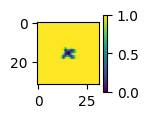

[[0.00182 ]
 [0.000035]
 [0.      ]
 [0.000001]
 [0.000003]
 [0.      ]
 [0.000425]
 [0.000004]
 [0.      ]
 [0.      ]
 [0.000856]
 [0.      ]
 [0.      ]
 [0.000003]
 [0.      ]
 [0.      ]
 [0.024188]
 [0.      ]
 [0.      ]
 [0.000115]
 [0.000001]
 [0.000001]
 [0.000028]
 [0.904009]
 [0.06851 ]
 [0.      ]]
0.1009165059691063


In [18]:
test_image = compress_image(open_image('./78/hsf_4/hsf_4_00062.png'), image_size)

test_image = test_image.reshape(image_size * image_size, 1)
test_image = np.array(test_image)

test_label_array = [0 for _ in range(len(folders))]
test_label_array[23] = 1
test_label_array = np.array(test_label_array).reshape(num_class, 1)
print(test_label_array)

reshaped = test_image.reshape(image_size, image_size)

plt.figure(figsize = (1,1))
plt.imshow(reshaped)
plt.colorbar()
plt.show()

prediction = predict(test_image, weights, biases)
print(prediction) # new prediction
print(get_loss(test_label_array, prediction)) # new loss

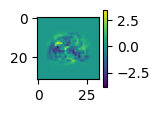

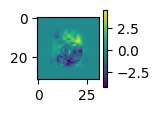

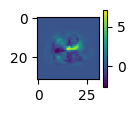

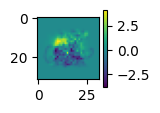

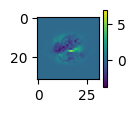

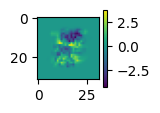

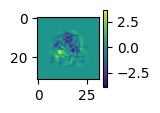

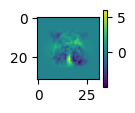

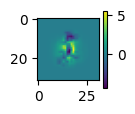

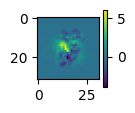

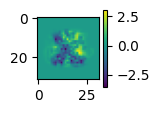

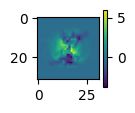

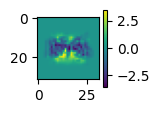

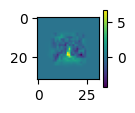

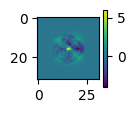

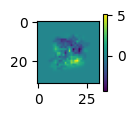

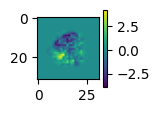

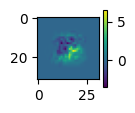

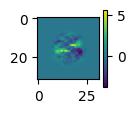

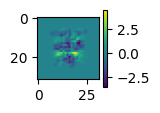

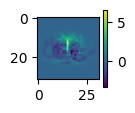

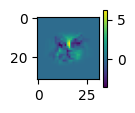

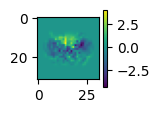

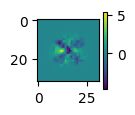

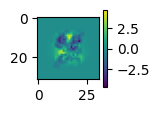

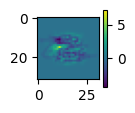

In [19]:
# show weight visualisation for new weights
w = weights.reshape(num_class, image_size, image_size)
b = biases.reshape(num_class, 1)
os.makedirs("vis", exist_ok=True)
for i in range(26):
    plt.figure(figsize = (1,1))
    plt.imshow(w[i])
    plt.colorbar()
    plt.show()
    plt.imsave(f'vis/{i}.png', w[i])